# The Kapitza Pendulum

### Physics 5300 Final Project AU25 - Neil Ghugare

The [Kapitza pendulum](https://en.wikipedia.org/wiki/Kapitza%27s_pendulum) is a rigid pendulum with a vertical-vibrating pivot point, nambed after Russian Nobel laureate Pyotr Kapitza, who developed a theory around the pendulum's propertieis in 1951. 

## Table of Contents

- Chapter 0: Imports
- Chapter I: The Derivation
- Chapter II: Numerical Integration
- Chapter III: Exploration and Analysis
- Chapter IV: Manim Animations
- Chatper V: A Quick Examination of Chaos
- *(Appendix)* Chapter VI: Slow-Fast Decomposition of Motion
- *(Appendix)* Chapter VII: Further Reading and Sources

## Chapter 0: Imports

In [1]:
%matplotlib widget 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

from scipy.integrate import solve_ivp
from IPython.display import display, Image

## Chapter I: The Derivation

This system is described by the following diagram:

<img src="kpdiagram.png" width="500px" />

For this system, with positive $x$ to the right and positive $y$ vertically up, we have the following system definitions,
* $\nu$: The so-called *driving frequency*, the frequency of the motor perturbing the lever arm vertically.
* $a$: The *driving amplitude*, the magnitude of the vertical oscillations of the lever arm.
* $l$: The *length* of the pendulum rod. 
* $m$: The *mass* of the pendulum bob.
* $\phi$: The *angle* of the pendulum with respect to the vertical, with $\phi=0$ being the bob straight down in $-y$.

We want to describe this system with the Lagrangian $\mathcal{L}$, given by
$$
\mathcal{L} = T-U,
$$
with potential energy $U$ and kinetic energy $T$. We first find the easier quantity, the potential energy. We define $U=0$ to be the horizontal line where $a=0$, with increasing energy upwards. We also assume, as indicated in the diagram, that the driving motor rotates clockwise. This means the potential energy is given by the gravitational potential energy due to the pendulum's position above the ground and the deviations in this height due to the driving motor, both impacting the gravitational potential energy. The height of the bob will be given by
$$
y_{\rm bob} = -l\cos{(\phi)},
$$
and the change in the driving amplitude $\Delta a$ is given by
$$
\Delta a = -a\cos{(\nu t)}.
$$
This has an implicit assumption that the motor is such that the driving amplitude $a$ is at minimum at $t=0$. Thus,
$$
U = mg(y_{\rm bob} + \Delta a) = -mg (l\cos{(\phi)} + a\cos{(\nu t)}).
$$

The kinetic energy is a tad more complicated. First, we ignore any resistance forces, like linear and higher-order drag, friction or heat from the motor, and any other non-ideal forces. The kinetic energy of the pendulum is the only thing we are concerned with, and it is given by
$$
T = \frac{1}{2} m (\dot{x}^2 + \dot{y}^2),
$$
in Cartesian coordinates. The $x$-direction velocity is simple, when expressed in terms of $\phi$ using polar coordinates,
$$
x = l\sin{(\phi)} \Rightarrow \dot{x}^2 = l^2\dot{\phi}^2\cos^2{(\phi)}.
$$
The $y$-direction has it's polar-coordinate counterpart, but also has the changes due to the change in driving amplitude:
$$
y = y_{\rm bob} + \Delta a = -(l\cos{(\phi)}+a\cos{(\nu t)}) \Rightarrow \dot{y}^2 = (l\dot{\phi}\sin{(\phi)}+a\nu\sin{(\nu t)})^2,
$$
or
$$
\dot{y}^2 = l^2\dot{\phi}^2\sin^2{(\phi)} + a^2\nu^2\sin^2{(\nu t)} + 2al\nu\dot{\phi}\sin{(\phi)}\sin{(\nu t)}.
$$
Thus,
$$
\dot{x}^2+\dot{y}^2 = l^2\dot{\phi}^2 + a^2\nu^2\sin^2{(\nu t)} + 2al\nu\dot{\phi}\sin{(\phi)}\sin{(\nu t)},
$$
and
$$
T = \frac{1}{2} m \left( l^2\dot{\phi}^2 + a^2\nu^2\sin^2{(\nu t)} + 2al\nu\dot{\phi}\sin{(\phi)}\sin{(\nu t)}\right).
$$

So, our Lagrangian is,
$$
\mathcal{L} = T-U = \frac{1}{2} m \left( l^2\dot{\phi}^2 + a^2\nu^2\sin^2{(\nu t)}+ 2al\nu\dot{\phi}\sin{(\phi)}\sin{(\nu t)}\right) +mg (l\cos{(\phi)}+a\cos{(\nu t)}).
$$

We can now recall the Euler-Lagrange equation and apply it to our one coordinate, $\phi$, 
$$
\frac{\partial \mathcal{L}}{\partial \phi} = \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{\phi}}.
$$

Before we go ahead and do this calculation, we can take advantage of some facts about the way the equation of motions come from the Euler-Lagrange equation. Based on the E-L equation, we can see by inspection that any terms that are constant, or any terms that only depend on time, will be "erased" from the equations of motion, so we can neglect them entirely. This includes the $a^2\nu^2\sin^2{(\nu t)}$ and the $a\cos{(\nu t)}$ term,
$$
\mathcal{L} = \frac{1}{2}ml^2\dot{\phi}^2 + mal\nu\dot{\phi}\sin{(\phi)}\sin{(\nu t)} + mgl\cos{(\phi)}.
$$

Now applying the E-L equation and taking the respective derivatives (and rearranging so $\ddot{\phi}$ is isolated and doing some cancellations), we get the equation of motion we wish to solve:
$$
\ddot{\phi} = - (g+a\nu^2 \cos{(\nu t)}) \frac{\sin{(\phi)}}{l}.
$$

We will numerically solve this equation of motion.

We also note a small assumption of our model. With the way we've set up our system in the diagram, we are assuming that the lever rod (the rod that moves the pendulum vertically) and the rod of the driving wheel that physically attenuates the lever rod both can stretch and compress without affecting the motion or dynamics of the system. If both rods were rigid, the pendulum would *not* have simple vertical oscillations, and would in fact sweep a circular arc, which we want to avoid. There are ways of creating diagrams of this system where this assumption is not needed, but given this is the prevalent style of diagram one finds (like on Wikipedia), we will continue with this diagram and assumption. We also assume no damping terms like air resistance.

## Chapter II: Numerical Integration

We import the class from the `PendulumSolver.py` file that will numerically solve this system. You can check out that file to learn more, but the help command on the file is provided for your inspection.

In [3]:
from PendulumSolver import KapitzaPendulum

help(KapitzaPendulum)

Help on class KapitzaPendulum in module PendulumSolver:

class KapitzaPendulum(builtins.object)
 |  KapitzaPendulum(m=1.0, l=1.0, g=1.0, a=1.0, nu=1.0)
 |
 |  Class that numerically solves the equations of motion for the Kapitza pendulum.
 |
 |  Methods defined here:
 |
 |  Liapunov_comparison(self, t_pts, phi_0, phi_dot_0, delta_phi=1e-06, delta_phi_dot=0.0)
 |      --- Description: ---
 |      Makes a comparsion relating to the Liapunov exponent, plotting log(|Delta phi|) vs. t.
 |
 |      --- Parameters (Required): ---
 |          1. t_pts - The finite array of time points to solve over.
 |          2. phi_pts - The phi points, phi(t).
 |          3. phi_dot_pts - The phi dot points, phi_dot(t).
 |
 |      --- Parameters (Optional): ---
 |          1. delta_phi - The (small) displacement between the two systems, for comparison.
 |          2. delta_phi_dot - The (small) velocity difference between the two systems, for comparison.
 |
 |      --- Returns: ---
 |          The matplotli

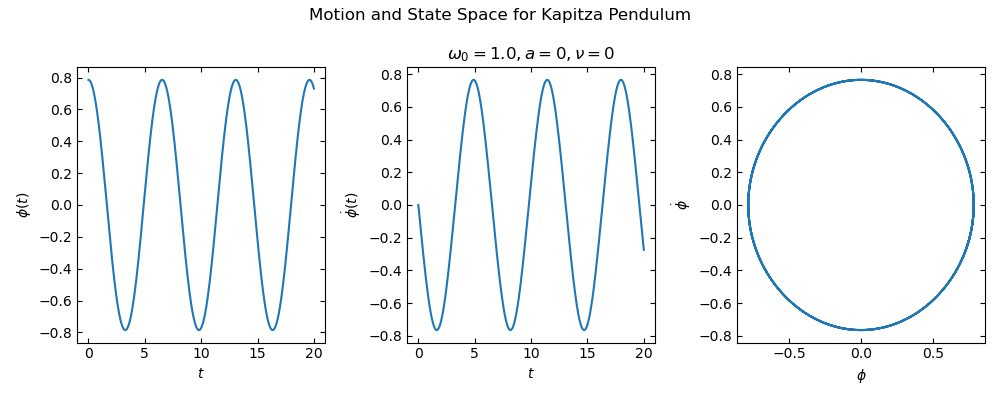

In [4]:
t_pts = np.arange(0., 20., 1e-3)

kp = KapitzaPendulum(a=0, nu=0)
phi, phi_dot = kp.solve_ode(t_pts, phi_0=np.pi/4, phi_dot_0=0.)

fig = kp.space_plots(t_pts, phi, phi_dot)

## Chapter III: Exploration and Analysis

For this analysis, we introduce a quantity that relates the driving amplitude $a$ to the length of the pendulum $l$. We call this parameter $\epsilon$, with
$$
\epsilon \equiv \frac{a}{l}.
$$

This helps us see how $a$ relates to $l$, relatively.

We will also introduce another relative parameter $f$, which relates the driving frequency $\nu$ to the natural frequency $\omega_0$. We define it as follows,
$$
f \equiv \frac{\nu}{\omega_0}.
$$

This means for our analysis, we will have three free parameters: $\omega_0$ will define the relation between $g$ and $l$, $f$ will define the relation between $\nu$ and $\omega_0$, and $\epsilon$ will define the relation between $a$ and $l$. For our purposes, we will use $g=1$ for our numerical solutions below. We won't necessarily use it, but we can rewrite our equation of motion to be:
$$
\ddot{\phi} = - \omega_0^2(1+\epsilon f^2 \cos{(f \omega_0 t)})\sin{(\phi)}.
$$

In fact, we will mostly use $l=g=1$ (ignoring units), such that $\omega_0^2$ equals 1. That is recommended for the widget too, as then you can explore how $f$ and $\epsilon$ directly change the system, as that would make $\nu$ and $a$ direct scalings of $\omega_0$ and $l$. 

In [5]:
m = 1  # Not really important, it's not used in the equations of motion.
l = 1  
g = 1  # Implies that omega0 is 1.

t_pts = np.arange(0., 20., 1e-3)

Output()

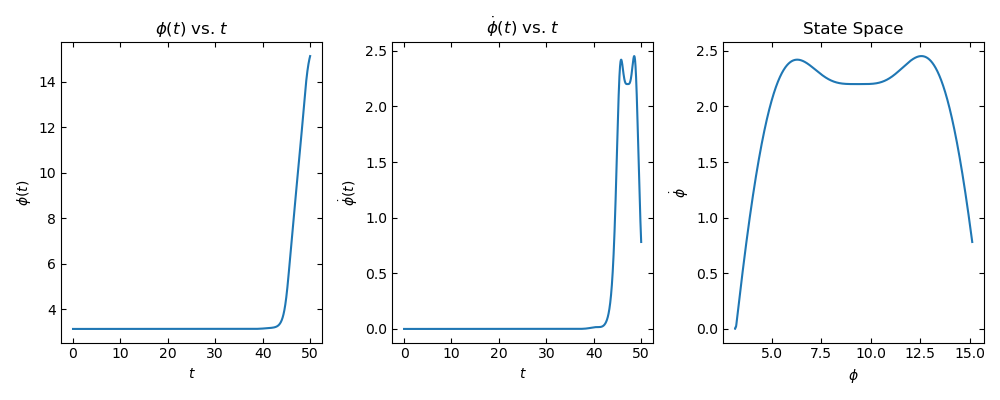

In [6]:
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

def setup_figure():
    ax1.set_title(r'$\phi(t)$ vs. $t$')
    ax1.set_xlabel(r'$t$')
    ax1.set_ylabel(r'$\phi(t)$')
    ax1.tick_params(axis='both', top=True, right=True, which='both', direction='in')

    ax2.set_title(r'$\dot{\phi}(t)$ vs. $t$')
    ax2.set_xlabel(r'$t$')
    ax2.set_ylabel(r'$\dot{\phi}(t)$')
    ax2.tick_params(axis='both', top=True, right=True, which='both', direction='in')

    ax3.set_title(r'State Space')
    ax3.set_xlabel(r'$\phi$')
    ax3.set_ylabel(r'$\dot{\phi}$')
    ax3.tick_params(axis='both', top=True, right=True, which='both', direction='in')

    fig.tight_layout()

def make_plots(omega0, epsilon, f, phi0, phi_dot0, t_max, ax1_passed, ax2_passed, ax3_passed):
    reset_graph(None)

    l = 1/np.sqrt(omega0)
    a = l*epsilon
    nu = f*omega0

    t_pts = np.arange(0., t_max, 1e-3)

    kp = KapitzaPendulum(m=1, l=l, g=1, a=a, nu=nu)
    phi, phidot = kp.solve_ode(t_pts, phi0, phi_dot0)

    ax1_passed.plot(t_pts, phi)
    ax2_passed.plot(t_pts, phidot)
    ax3_passed.plot(phi, phidot)

    fig.tight_layout()

def reset_graph(event):
    ax1.clear()
    ax2.clear()
    ax3.clear()

    setup_figure()

button = widgets.Button(description='Clear Graph')
button.on_click(reset_graph)

style = {'description_width': 'initial'}

omega0 = widgets.FloatSlider(min=0.1, max=10., step=.05, value=1., description=r'$\omega_0$', continuous_update=False, style=style)
epsilon = widgets.FloatSlider(min=0., max=10., step=.05, value=1., description=r'$\epsilon$', continuous_update=False, style=style)
f = widgets.FloatSlider(min=0., max=50., step=.05, value=1., description=r'$f$', continuous_update=False, style=style)
phi0 = widgets.FloatSlider(min=-np.pi, max=np.pi, step=.05, value=np.pi, description=r'$\phi_0$', continuous_update=False, style=style)
phi_dot0 = widgets.FloatSlider(min=0., max=10., step=.05, value=0., description=r'$\dot{\phi}_0$', continuous_update=False, style=style)
t_max = widgets.FloatSlider(min=10., max=100., step=1., value=50., description=r'$t_{\rm max}$', continuous_update=False, style=style)

# Group inline (e.g. 2 rows of sliders)
ui = widgets.VBox([
    widgets.HBox([omega0, epsilon, f]),
    widgets.HBox([phi0, phi_dot0, t_max, button])
])

out = widgets.interactive_output(
    make_plots, 
    {
        'omega0': omega0,
        'epsilon': epsilon,
        'f': f,
        'phi0': phi0,
        'phi_dot0': phi_dot0,
        't_max': t_max,
        'ax1_passed': widgets.fixed(ax1),
        'ax2_passed': widgets.fixed(ax2),
        'ax3_passed': widgets.fixed(ax3)
    }
)
display(ui, out)

setup_figure()

## Chapter IV: Manim Animations

In [7]:
from ManimAnimation import KapitzaPendulumAnimation, PendulumParams

In [8]:
# %manim -qm -v WARNING KapitzaPendulumAnimation

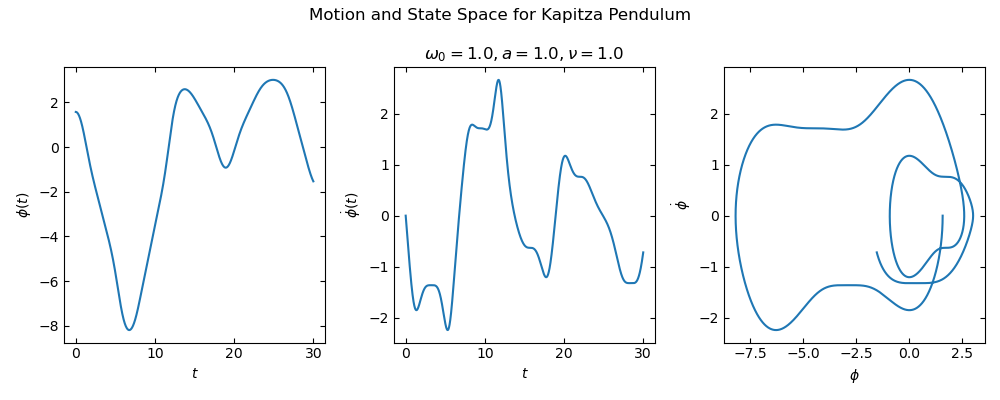

In [9]:
t_pts = np.arange(0., 30., 1e-3)

kp = KapitzaPendulum()
phi, phi_dot = kp.solve_ode(t_pts, phi_0=np.pi/2, phi_dot_0=0.)

fig = kp.space_plots(t_pts, phi, phi_dot)

In [10]:
params = PendulumParams(a=0.1, nu=30.0, phi_0=np.pi-0.1, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumAnimation.params = params

# Use --fps 120 to double frame rate
# %manim -qm -v WARNING KapitzaPendulumAnimation  

PendulumParams(m=1.0, l=1.0, g=1.0, a=0.1, nu=30.0, phi_0=3.041592653589793, phi_dot_0=0.0, t_max=30.0)


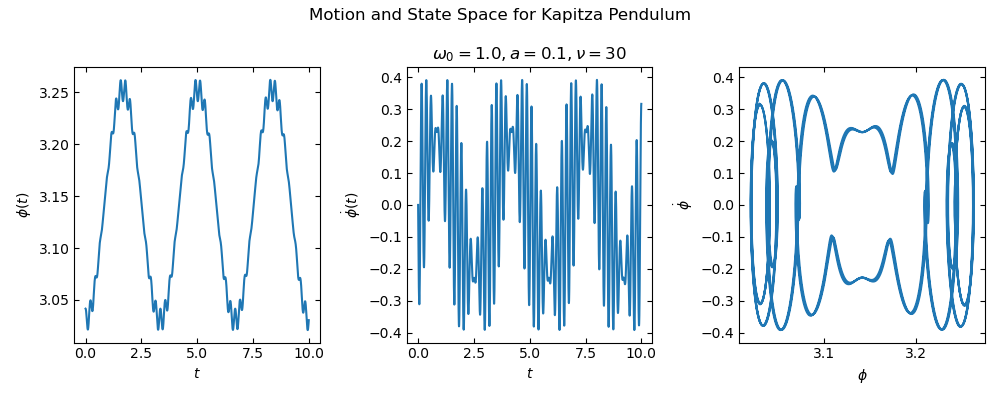

In [11]:
t_pts = np.arange(0., 10., 1e-3)

kp = KapitzaPendulum(m=1, l=1, g=1, a=0.1, nu=30)
phi, phi_dot = kp.solve_ode(t_pts, phi_0=np.pi-0.1, phi_dot_0=0.)

fig = kp.space_plots(t_pts, phi, phi_dot)

In [12]:
params = PendulumParams(a=0.1, nu=2.5, phi_0=0.86, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumAnimation.params = params

# Use --fps 120 to double frame rate
# %manim -qm -v WARNING KapitzaPendulumAnimation  

PendulumParams(m=1.0, l=1.0, g=1.0, a=0.1, nu=2.5, phi_0=0.86, phi_dot_0=0.0, t_max=30.0)


In [13]:
params = PendulumParams(a=0, nu=0, phi_0=np.pi/4, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumAnimation.params = params

# Use --fps 120 to double frame rate
# %manim -qm -v WARNING KapitzaPendulumAnimation  

PendulumParams(m=1.0, l=1.0, g=1.0, a=0, nu=0, phi_0=0.7853981633974483, phi_dot_0=0.0, t_max=30.0)


In [14]:
params = PendulumParams(a=5.05, nu=4., phi_0=np.pi/2, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumAnimation.params = params

# Use --fps 120 to double frame rate
# %manim -qm -v WARNING KapitzaPendulumAnimation  

PendulumParams(m=1.0, l=1.0, g=1.0, a=5.05, nu=4.0, phi_0=1.5707963267948966, phi_dot_0=0.0, t_max=30.0)


In [15]:
params = PendulumParams(a=6.85, nu=4., phi_0=np.pi/2, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumAnimation.params = params

# Use --fps 120 to double frame rate
# %manim -qm -v WARNING KapitzaPendulumAnimation  

PendulumParams(m=1.0, l=1.0, g=1.0, a=6.85, nu=4.0, phi_0=1.5707963267948966, phi_dot_0=0.0, t_max=30.0)


## Chapter V: A Quick Examination of Chaos

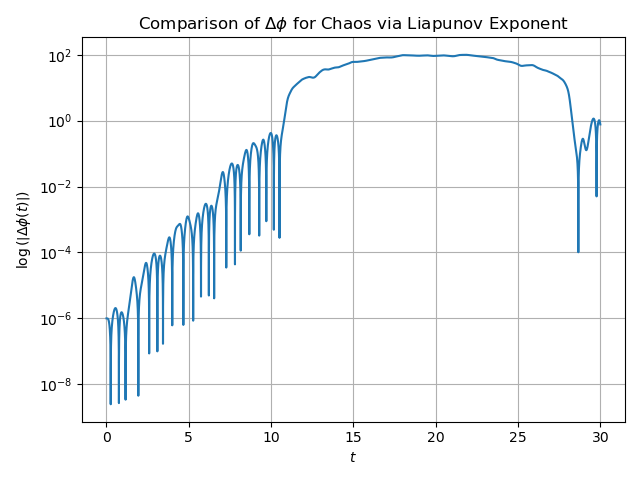

In [16]:
kp = KapitzaPendulum(a=6.85, nu=4.)
t_pts = np.arange(0., 30., 1e-3)

fig = kp.Liapunov_comparison(t_pts, phi_0=np.pi/2, phi_dot_0=0.0, delta_phi=1.0e-6)

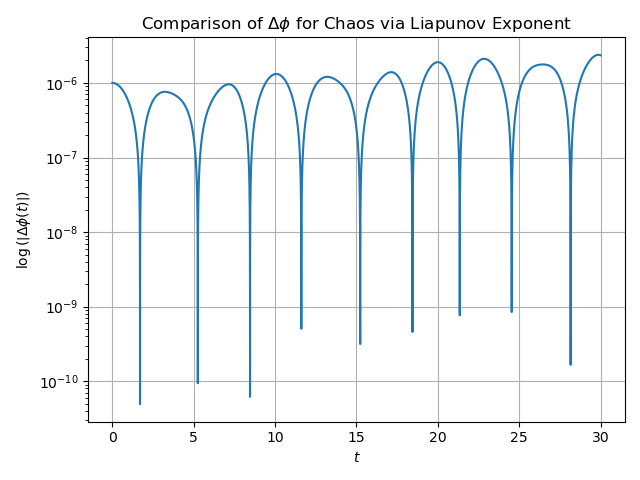

In [17]:
kp = KapitzaPendulum(a=0.1, nu=2.5)
t_pts = np.arange(0., 30., 1e-3)

fig = kp.Liapunov_comparison(t_pts, phi_0=0.86, phi_dot_0=0.0, delta_phi=1.0e-6)

In [18]:
from ManimAnimation import KapitzaPendulumChaosAnimation

In [19]:
params = PendulumParams(a=6.85, nu=4., phi_0=np.pi/2, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumChaosAnimation.params = params

# %manim -qm -v WARNING KapitzaPendulumChaosAnimation

PendulumParams(m=1.0, l=1.0, g=1.0, a=6.85, nu=4.0, phi_0=1.5707963267948966, phi_dot_0=0.0, t_max=30.0)


In [20]:
params = PendulumParams(a=0.1, nu=2.5, phi_0=0.86, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumChaosAnimation.params = params

# %manim -qm -v WARNING KapitzaPendulumChaosAnimation

PendulumParams(m=1.0, l=1.0, g=1.0, a=0.1, nu=2.5, phi_0=0.86, phi_dot_0=0.0, t_max=30.0)


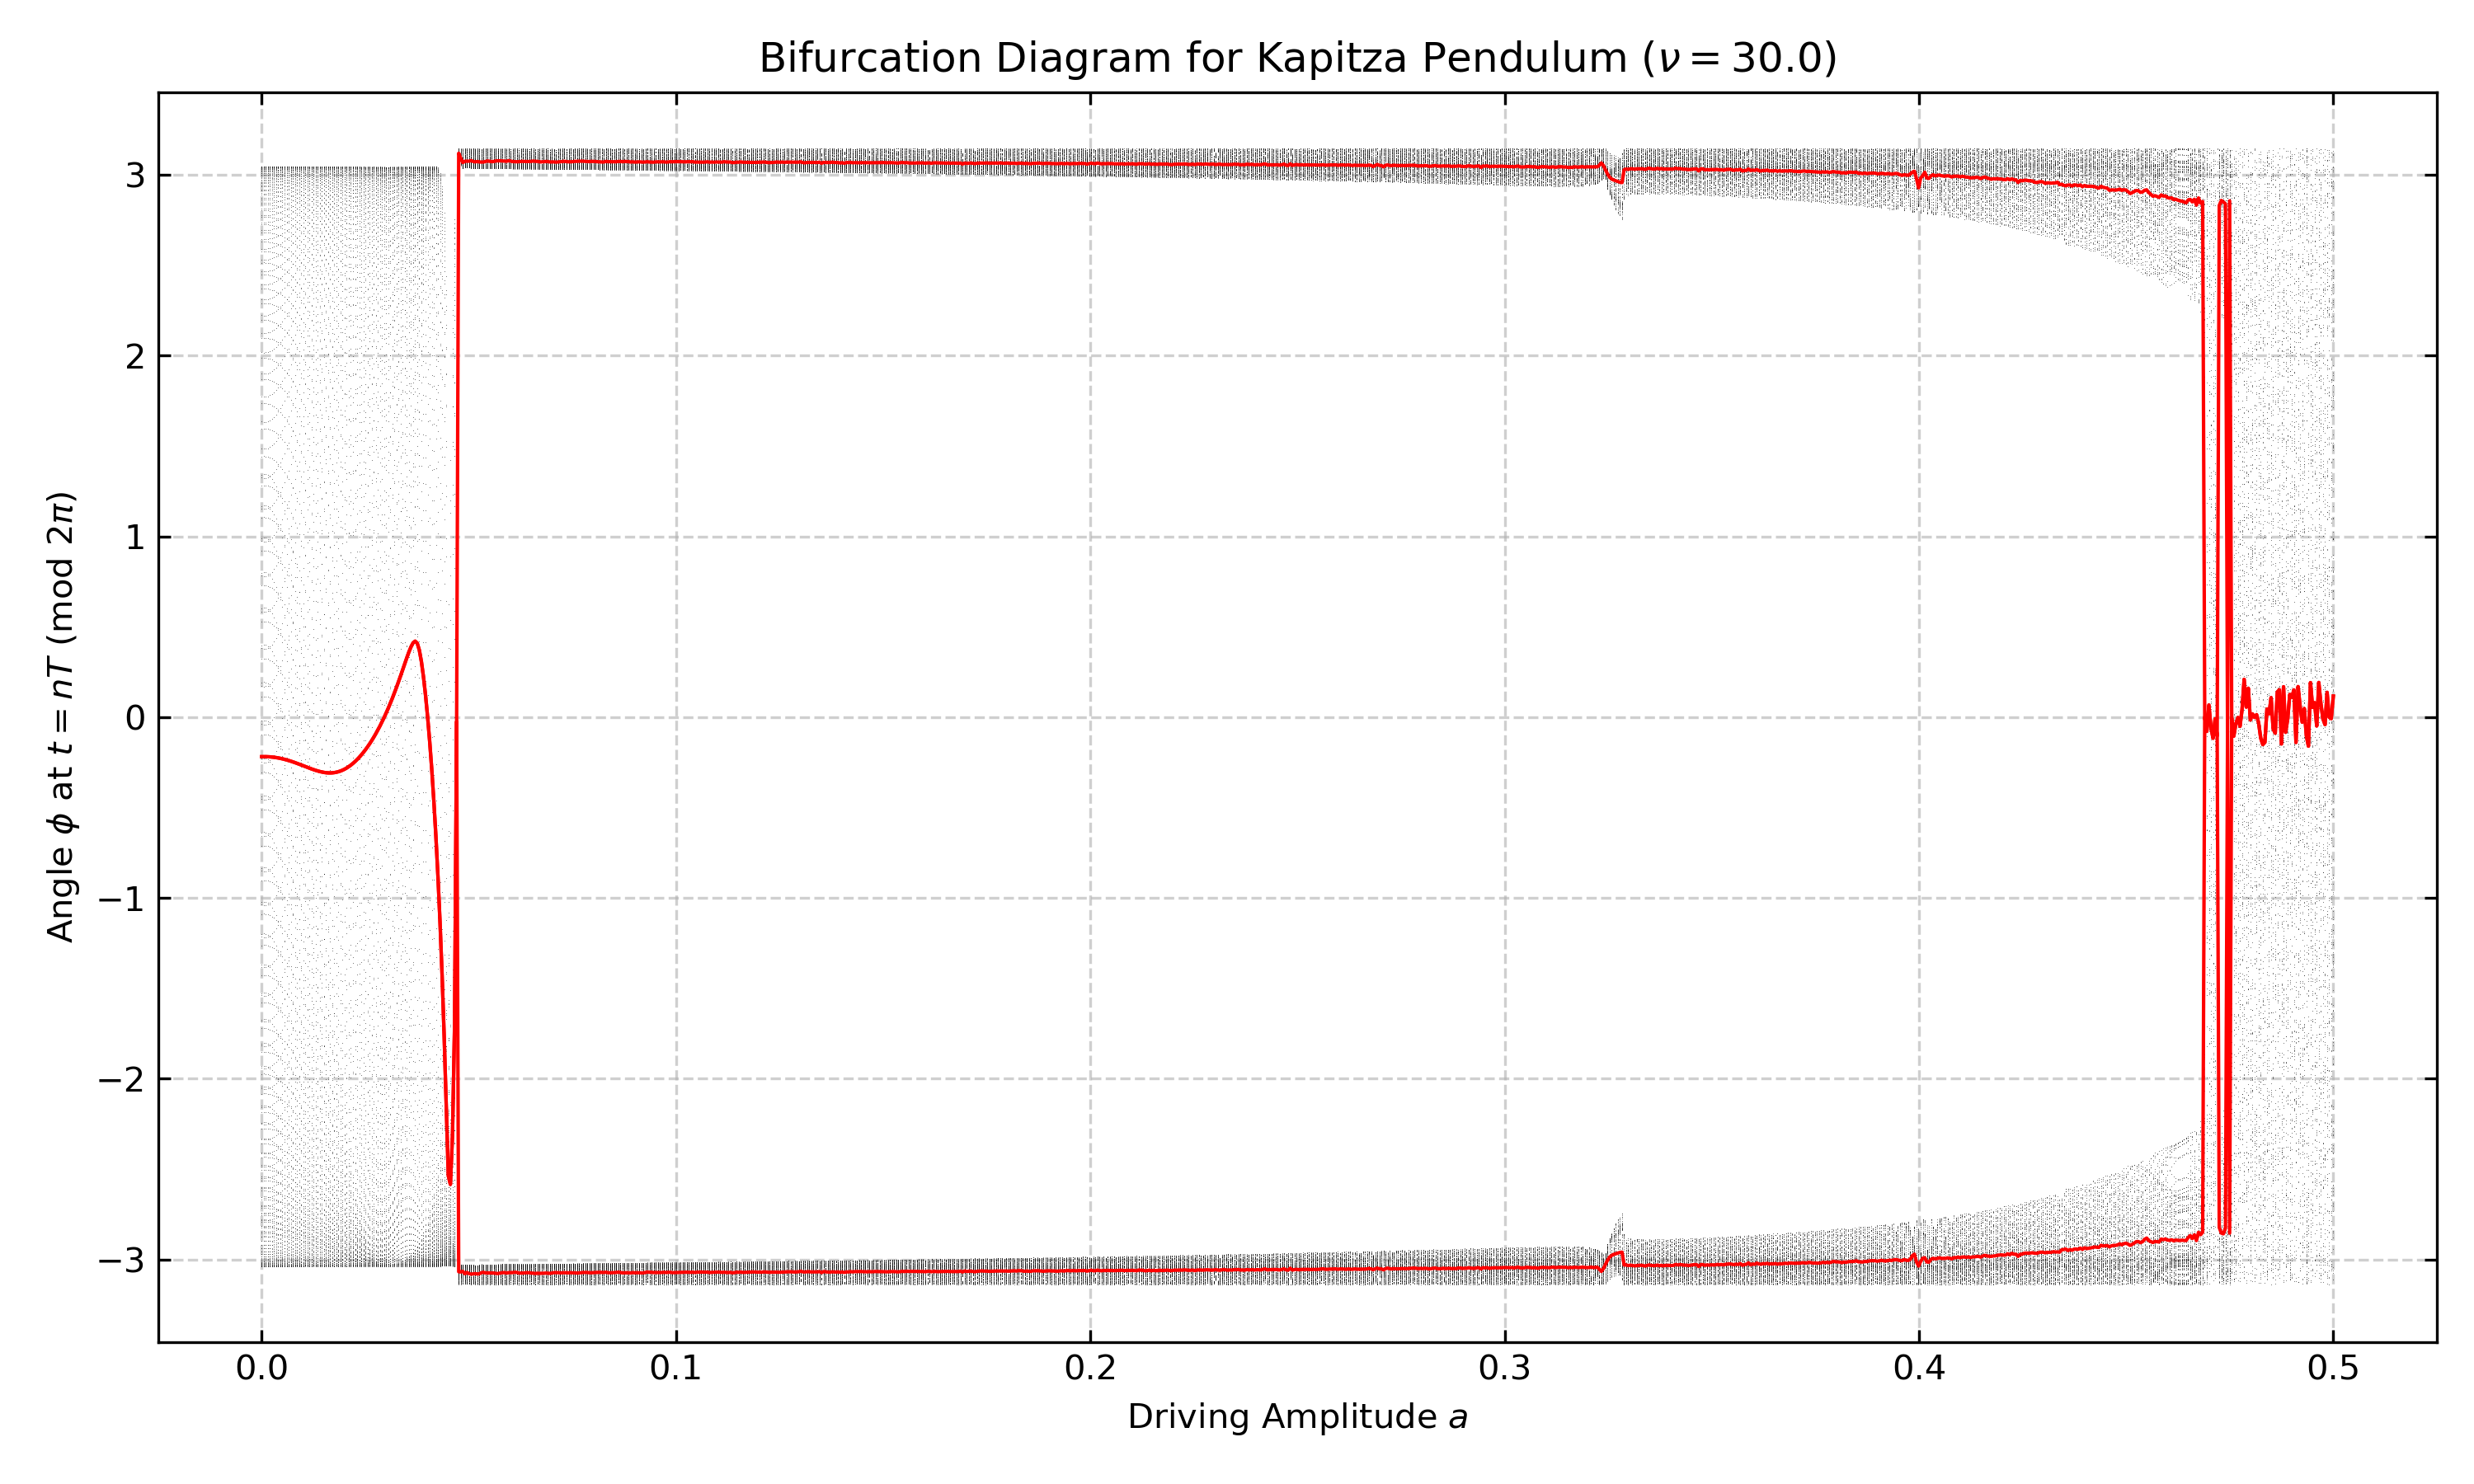

In [21]:
kp = KapitzaPendulum(a=0.1, nu=30.0)
t_pts = np.arange(0., 30., 1e-3)

# This is an intensive process so we just read and show the earlier created image.
# fig = kp.bifurcation(phi_0=np.pi-0.1, phi_dot_0=0.0, a_range=(0.0, 0.5, 1000))
# fig.savefig('BifurcationDiagram.png', dpi=300)
# plt.close()

Image(filename='BifurcationDiagram.png')  # Display the last saved image.

In [22]:
params = PendulumParams(a=0.25, nu=30.0, phi_0=np.pi-0.1, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumChaosAnimation.params = params

# %manim -qm -v WARNING KapitzaPendulumChaosAnimation

PendulumParams(m=1.0, l=1.0, g=1.0, a=0.25, nu=30.0, phi_0=3.041592653589793, phi_dot_0=0.0, t_max=30.0)


In [23]:
params = PendulumParams(a=0.5, nu=30.0, phi_0=np.pi-0.1, phi_dot_0=0.0)
print(params)  # Debugging check, ensure the right parameters are being used 

KapitzaPendulumChaosAnimation.params = params

# %manim -qm -v WARNING KapitzaPendulumChaosAnimation

PendulumParams(m=1.0, l=1.0, g=1.0, a=0.5, nu=30.0, phi_0=3.041592653589793, phi_dot_0=0.0, t_max=30.0)


100%|████████████████████████████████████████████████████████████████████████████████████| 500/500 [08:57<00:00,  1.07s/it]


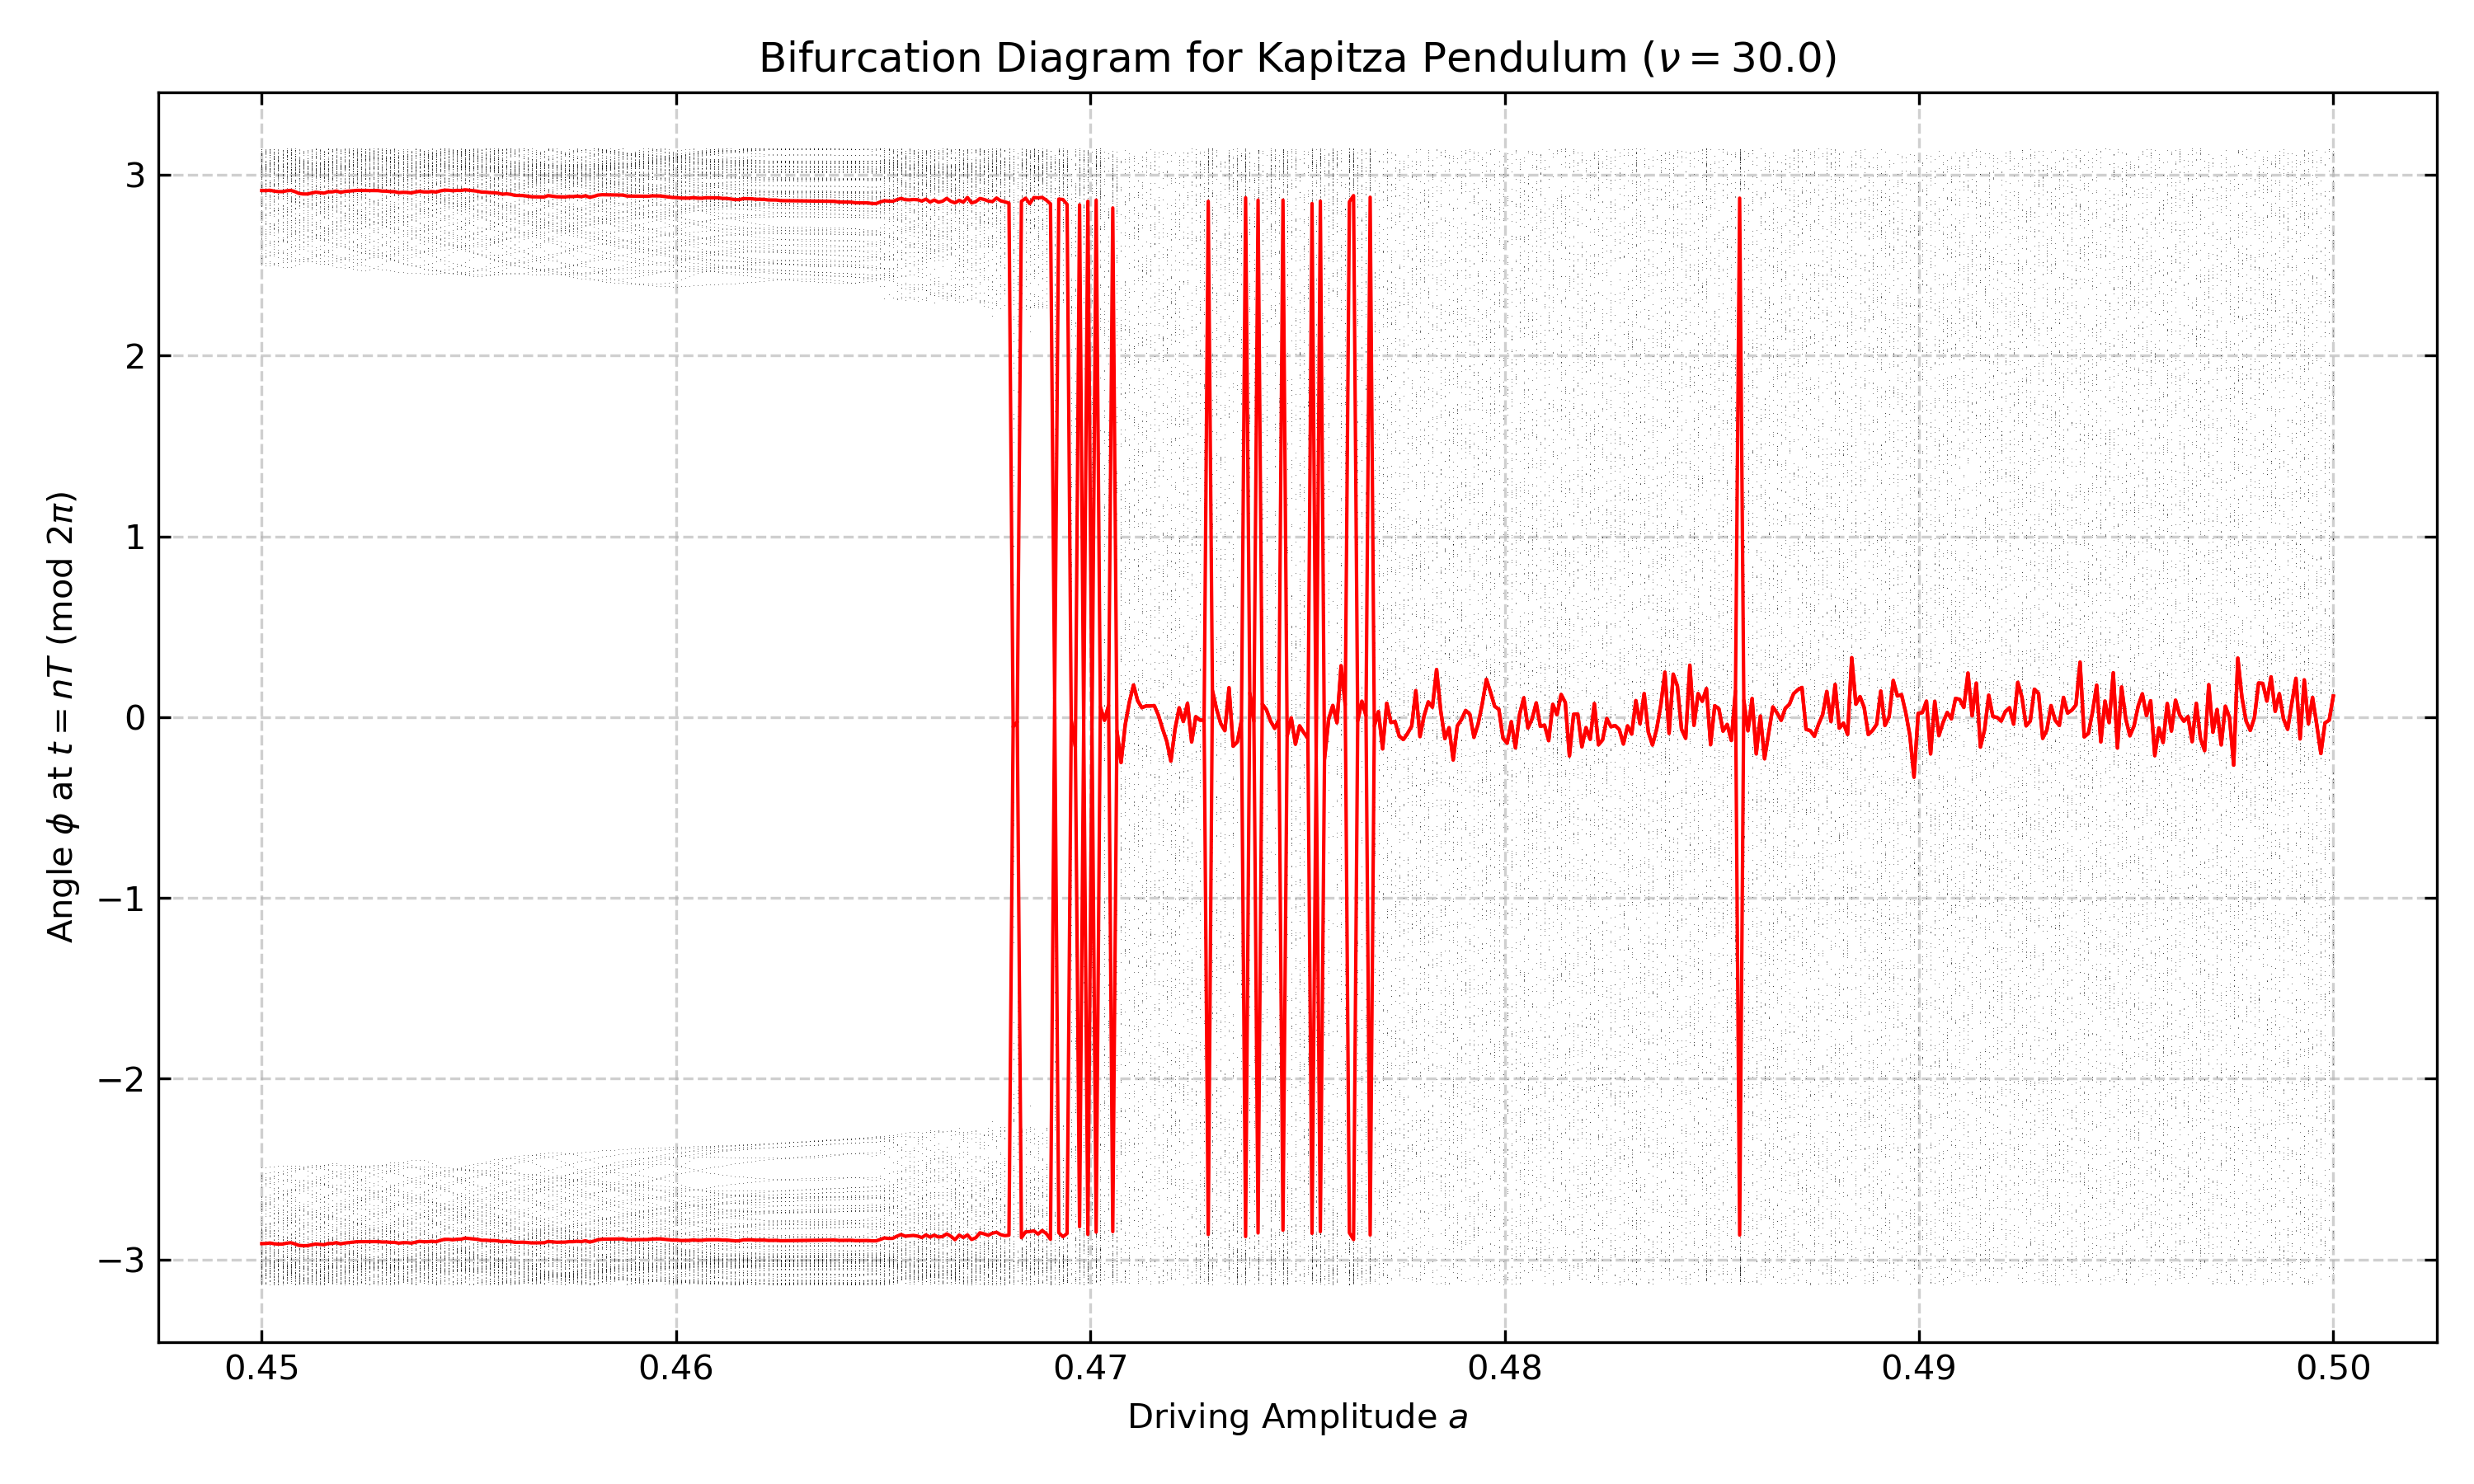

In [24]:
# This is an intensive process so we just read and show the earlier created image.
# fig = kp.bifurcation(phi_0=np.pi-0.1, phi_dot_0=0.0, a_range=(0.45, 0.5, 500))
# fig.savefig('BifurcationDiagram_2.png', dpi=300)
# plt.close()

Image(filename='BifurcationDiagram_2.png')  # Display the last saved image.

## Chapter VI *(Appendix)*: Slow-Fast Decomposition of Motion

For the limits that $\epsilon << 1$ and $f>>1$, we can decompose the angle $\phi$ into a fast component $\xi$ and a slow component $\Phi$, such that
$$
\phi = \Phi + \xi.
$$
We recall our differential equation,
$$
\ddot{\phi} = - \omega_0^2(1+\epsilon f^2 \cos{(f \omega_0 t)})\sin{(\phi)}.
$$

Let $\tau = \omega_0 t$, and let primes be the notation for derivatives with respect to $\tau$. Then,
$$
\ddot{\phi} = - \omega_0^2(1+\epsilon f^2 \cos{(f \tau)})\sin{(\phi)}.
$$

Plugging in our decomposition, we get the equation of motion,
$$
\ddot{\Phi} + \ddot{\xi} = -\omega^2_0 ( 1 + \epsilon f^2 \cos{(f\tau)}) \sin{(\Phi + \xi)}.
$$

Using an identity for the sine addition, this equation exactly equals
$$
\ddot{\Phi} + \ddot{\xi} = -\omega^2_0 ( 1 + \epsilon f^2 \cos{(f\tau)}) (\sin{(\Phi)}\cos{(\xi)} + \cos{(\Phi)}\sin{(\xi)}).
$$

In the $\epsilon << 1$ limit, we can apply a small angle approximation, as the displacement will be small. This implies that $\sin{(\xi)}\approx \xi$ and $\cos{(\xi)}\approx 1$. Hence,
$$
\ddot{\Phi} + \ddot{\xi} \approx -\omega^2_0 ( 1 + \epsilon f^2 \cos{(f\tau)}) (\sin{(\Phi)}+ \cos{(\Phi)}\xi).
$$

Expanding this we get four terms,
$$
\ddot{\Phi} + \ddot{\xi} \approx -\omega^2_0\sin{(\Phi)} - \omega^2_0 \xi \cos{(\Phi)} - \omega^2_0 \epsilon f^2 \cos{(f\tau)} \sin{(\Phi)} - \omega^2_0 \epsilon f^2 \xi \cos{(f\tau)} \cos{(\Phi)}.
$$

Doing some simplification by substituting $f^2$, we get
$$
\ddot{\Phi} + \ddot{\xi} \approx -\omega^2_0\sin{(\Phi)} - \omega^2_0 \xi \cos{(\Phi)} - \nu^2 \epsilon \cos{(f\tau)} \sin{(\Phi)} - \nu^2 \epsilon \xi \cos{(f\tau)} \cos{(\Phi)}.
$$

We can isolate the $\xi$ terms to get a relation like
$$
\ddot{\xi} \approx -\xi \cos{(\Phi)} (\omega^2_0  + \epsilon \nu^2 \cos{(f\tau)}).
$$

We can solve this directly. Focusing on the motion only, we can ignore the integration constants and see that
$$
\xi = 
$$

## Chapter VII *(Appendix)*: Further Reading and Sources

[[1]](https://link.springer.com/content/pdf/10.1007/BF01013307.pdf) McLaughlin *J. Stat. Phys.* (1980) <br>
[[2]](https://en.wikipedia.org/wiki/Kapitza's_pendulum) Kapitza Pendulum, Wikipedia <br>
[[3]](https://www.sciencedirect.com/science/article/pii/0375960183903365?via%3Dihub) Koch et al. *Phys. Lett. A* (1983) <br>
[[4]](https://pubs.aip.org/aapt/ajp/article-abstract/60/10/903/1054037/Stability-and-Hopf-bifurcations-in-an-inverted?redirectedFrom=fulltext) Blackburn et al. *Am. J. Phys.* (1992) <br>
[[5]](https://ufn.ru/ufn51/ufn51_5/Russian/r515_b.pdf) Kapitza *Soviet Phys. JETP* (1951) <br>